#1. Importing Libraries



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np

# For setting seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)


#2. Data Preparation

In [ ]:
# Data transformations with data augmentation
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image size from 32x32 to 224x224
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize test set image size from 32x32 to 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Split training set into training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


#3. Model Definitions

In [ ]:
# ResNet-18
resnet18 = models.resnet18(num_classes=10)

# AlexNet
alexnet = models.alexnet(num_classes=10)

# MobileNetV2
mobilenet_v2 = models.mobilenet_v2(num_classes=10)

models_dict = {'ResNet-18': resnet18, 'AlexNet': alexnet, 'MobileNetV2': mobilenet_v2}


#4. Training and Validation Functions

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss, correct = 0, 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(targets).sum().item()

    return total_loss / len(train_loader), 100. * correct / len(train_loader.dataset)


def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss, correct = 0, 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(targets).sum().item()

    return total_loss / len(val_loader), 100. * correct / len(val_loader.dataset)


#5. Hyperparameter Tuning and Model Training

Training ResNet-18 with LR=0.01 and Optimizer=SGD
Epoch 1/20, Train Loss: 1.8321, Val Loss: 1.6861, Train Acc: 32.54%, Val Acc: 38.76%
Epoch 2/20, Train Loss: 1.4937, Val Loss: 1.4932, Train Acc: 44.81%, Val Acc: 44.72%
Epoch 3/20, Train Loss: 1.3336, Val Loss: 1.3712, Train Acc: 51.31%, Val Acc: 50.49%
Epoch 4/20, Train Loss: 1.2211, Val Loss: 1.3161, Train Acc: 55.33%, Val Acc: 53.23%
Epoch 5/20, Train Loss: 1.1347, Val Loss: 1.3424, Train Acc: 58.93%, Val Acc: 52.07%
Epoch 6/20, Train Loss: 1.0569, Val Loss: 1.2906, Train Acc: 61.81%, Val Acc: 55.19%
Epoch 7/20, Train Loss: 0.9932, Val Loss: 1.1987, Train Acc: 64.53%, Val Acc: 57.72%
Epoch 8/20, Train Loss: 0.9370, Val Loss: 1.0349, Train Acc: 66.51%, Val Acc: 63.98%
Epoch 9/20, Train Loss: 0.8774, Val Loss: 1.0062, Train Acc: 68.80%, Val Acc: 64.98%
Epoch 10/20, Train Loss: 0.8273, Val Loss: 1.0075, Train Acc: 70.47%, Val Acc: 64.64%
Epoch 11/20, Train Loss: 0.7824, Val Loss: 0.9938, Train Acc: 72.42%, Val Acc: 65.93%
Epoch 12/20, 

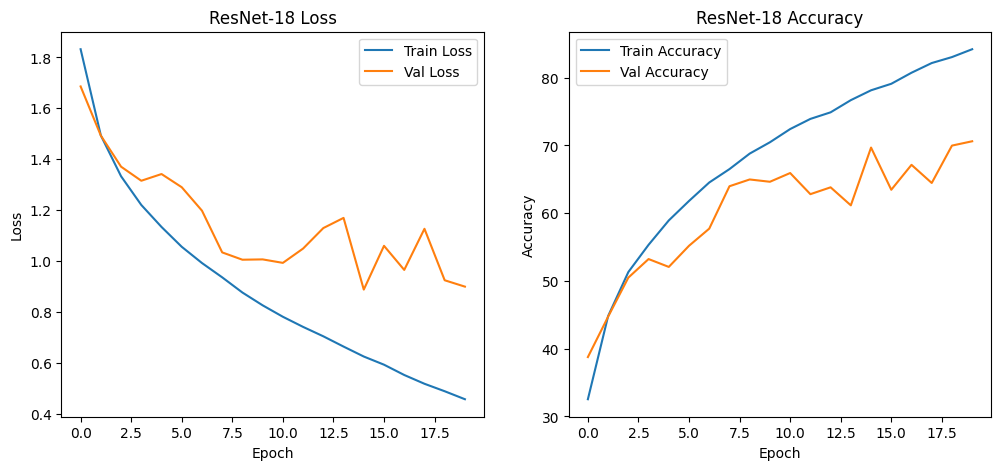

Training ResNet-18 with LR=0.01 and Optimizer=Adam
Epoch 1/20, Train Loss: 1.9401, Val Loss: 1.7423, Train Acc: 31.51%, Val Acc: 39.30%
Epoch 2/20, Train Loss: 1.3422, Val Loss: 1.1935, Train Acc: 51.08%, Val Acc: 57.98%
Epoch 3/20, Train Loss: 0.9961, Val Loss: 0.9885, Train Acc: 64.39%, Val Acc: 65.20%
Epoch 4/20, Train Loss: 0.7746, Val Loss: 0.9201, Train Acc: 72.49%, Val Acc: 68.28%
Epoch 5/20, Train Loss: 0.6161, Val Loss: 0.6472, Train Acc: 78.51%, Val Acc: 77.74%
Epoch 6/20, Train Loss: 0.5118, Val Loss: 0.6520, Train Acc: 82.17%, Val Acc: 77.57%
Epoch 7/20, Train Loss: 0.4352, Val Loss: 0.6945, Train Acc: 84.99%, Val Acc: 77.50%
Epoch 8/20, Train Loss: 0.3681, Val Loss: 0.6517, Train Acc: 87.24%, Val Acc: 77.68%
Epoch 9/20, Train Loss: 0.3155, Val Loss: 0.5826, Train Acc: 88.98%, Val Acc: 81.18%
Epoch 10/20, Train Loss: 0.2732, Val Loss: 0.5925, Train Acc: 90.51%, Val Acc: 82.35%
Epoch 11/20, Train Loss: 0.2282, Val Loss: 0.6462, Train Acc: 91.97%, Val Acc: 82.39%
Epoch 12/20,

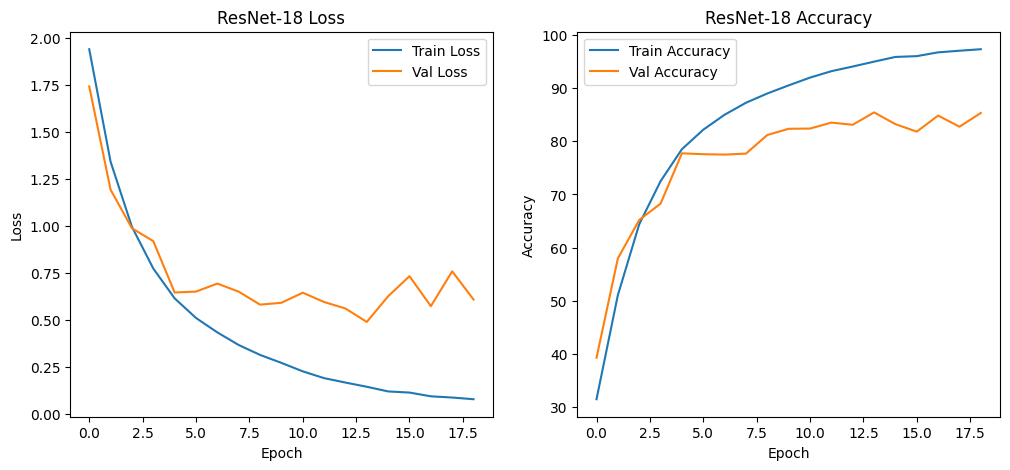

Training ResNet-18 with LR=0.001 and Optimizer=SGD
Epoch 1/20, Train Loss: 0.0585, Val Loss: 0.5567, Train Acc: 97.99%, Val Acc: 86.12%
Epoch 2/20, Train Loss: 0.0562, Val Loss: 0.5482, Train Acc: 98.15%, Val Acc: 86.58%
Epoch 3/20, Train Loss: 0.0584, Val Loss: 0.5556, Train Acc: 97.95%, Val Acc: 86.08%
Epoch 4/20, Train Loss: 0.0557, Val Loss: 0.5358, Train Acc: 98.22%, Val Acc: 86.36%
Epoch 5/20, Train Loss: 0.0553, Val Loss: 0.5490, Train Acc: 98.10%, Val Acc: 86.25%
Epoch 6/20, Train Loss: 0.0558, Val Loss: 0.5501, Train Acc: 98.11%, Val Acc: 86.27%
Epoch 7/20, Train Loss: 0.0524, Val Loss: 0.5423, Train Acc: 98.25%, Val Acc: 86.44%
Epoch 8/20, Train Loss: 0.0530, Val Loss: 0.5305, Train Acc: 98.19%, Val Acc: 86.68%
Epoch 9/20, Train Loss: 0.0536, Val Loss: 0.5425, Train Acc: 98.20%, Val Acc: 86.38%
Epoch 10/20, Train Loss: 0.0541, Val Loss: 0.5360, Train Acc: 98.19%, Val Acc: 86.54%
Epoch 11/20, Train Loss: 0.0501, Val Loss: 0.5197, Train Acc: 98.31%, Val Acc: 86.52%
Epoch 12/20,

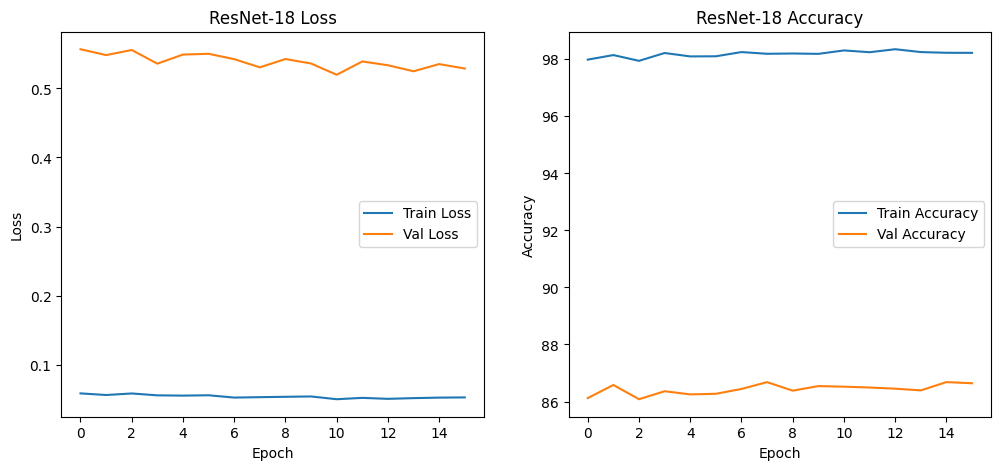

Training ResNet-18 with LR=0.001 and Optimizer=Adam
Epoch 1/20, Train Loss: 0.0250, Val Loss: 0.4811, Train Acc: 99.19%, Val Acc: 88.45%
Epoch 2/20, Train Loss: 0.0092, Val Loss: 0.4953, Train Acc: 99.77%, Val Acc: 89.19%
Epoch 3/20, Train Loss: 0.0061, Val Loss: 0.5417, Train Acc: 99.85%, Val Acc: 88.86%
Epoch 4/20, Train Loss: 0.0031, Val Loss: 0.5425, Train Acc: 99.95%, Val Acc: 89.12%
Epoch 5/20, Train Loss: 0.0024, Val Loss: 0.5617, Train Acc: 99.97%, Val Acc: 88.68%
Epoch 6/20, Train Loss: 0.0015, Val Loss: 0.5953, Train Acc: 99.97%, Val Acc: 88.80%
Early Stopping triggered at epoch 6


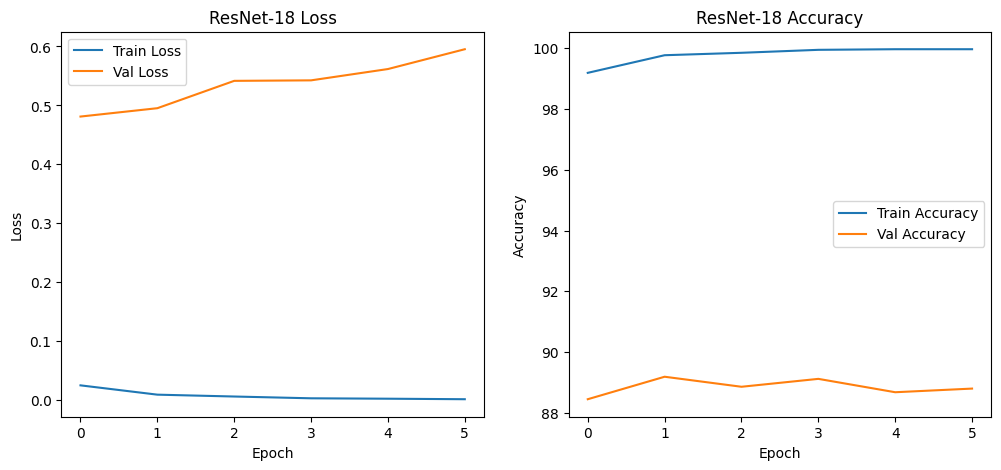

Training AlexNet with LR=0.01 and Optimizer=SGD
Epoch 1/20, Train Loss: 2.3020, Val Loss: 2.3011, Train Acc: 10.74%, Val Acc: 16.17%
Epoch 2/20, Train Loss: 2.2981, Val Loss: 2.2879, Train Acc: 12.02%, Val Acc: 14.39%
Epoch 3/20, Train Loss: 2.2123, Val Loss: 2.0946, Train Acc: 17.67%, Val Acc: 25.64%
Epoch 4/20, Train Loss: 2.0009, Val Loss: 1.9607, Train Acc: 26.36%, Val Acc: 27.67%
Epoch 5/20, Train Loss: 1.8746, Val Loss: 1.8661, Train Acc: 31.05%, Val Acc: 32.50%
Epoch 6/20, Train Loss: 1.7346, Val Loss: 1.6742, Train Acc: 36.62%, Val Acc: 39.27%
Epoch 7/20, Train Loss: 1.6237, Val Loss: 1.5662, Train Acc: 40.80%, Val Acc: 42.82%
Epoch 8/20, Train Loss: 1.5398, Val Loss: 1.5584, Train Acc: 43.97%, Val Acc: 45.26%
Epoch 9/20, Train Loss: 1.4738, Val Loss: 1.4606, Train Acc: 46.56%, Val Acc: 47.48%
Epoch 10/20, Train Loss: 1.4174, Val Loss: 1.4607, Train Acc: 48.98%, Val Acc: 46.12%
Epoch 11/20, Train Loss: 1.3738, Val Loss: 1.4450, Train Acc: 50.30%, Val Acc: 48.95%
Epoch 12/20, Tr

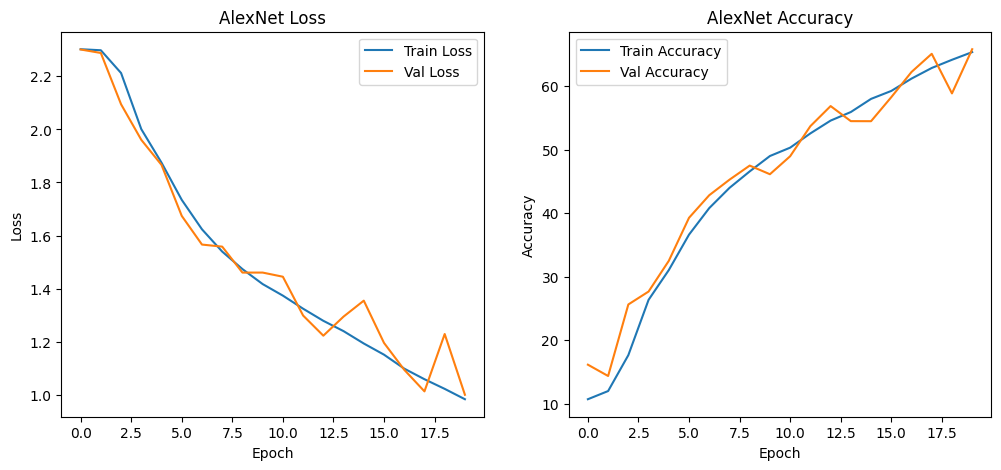

Training AlexNet with LR=0.01 and Optimizer=Adam
Epoch 1/20, Train Loss: 189197.2822, Val Loss: 2.3031, Train Acc: 10.11%, Val Acc: 9.98%
Epoch 2/20, Train Loss: 2.3037, Val Loss: 2.3027, Train Acc: 9.88%, Val Acc: 10.18%
Epoch 3/20, Train Loss: 2.3033, Val Loss: 2.3033, Train Acc: 9.96%, Val Acc: 9.90%
Epoch 4/20, Train Loss: 2.3034, Val Loss: 2.3026, Train Acc: 9.71%, Val Acc: 10.05%
Epoch 5/20, Train Loss: 2.3034, Val Loss: 2.3025, Train Acc: 10.08%, Val Acc: 10.18%
Epoch 6/20, Train Loss: 2.3035, Val Loss: 2.3028, Train Acc: 9.94%, Val Acc: 9.90%
Epoch 7/20, Train Loss: 2.3035, Val Loss: 2.3034, Train Acc: 9.94%, Val Acc: 9.90%
Epoch 8/20, Train Loss: 2.3033, Val Loss: 2.3033, Train Acc: 10.03%, Val Acc: 9.86%
Epoch 9/20, Train Loss: 2.3035, Val Loss: 2.3030, Train Acc: 9.98%, Val Acc: 10.25%
Epoch 10/20, Train Loss: 2.3035, Val Loss: 2.3029, Train Acc: 9.75%, Val Acc: 9.81%
Early Stopping triggered at epoch 10


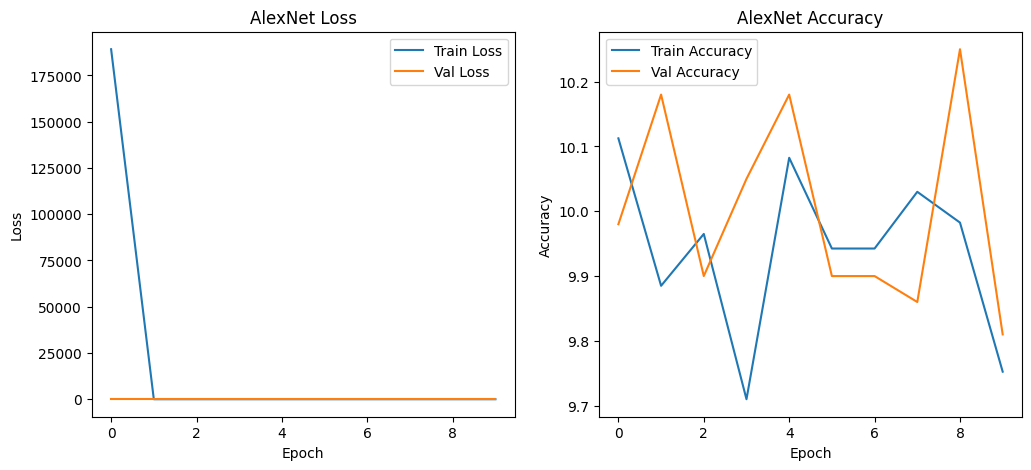

Training AlexNet with LR=0.001 and Optimizer=SGD
Epoch 1/20, Train Loss: 2.3029, Val Loss: 2.3029, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 2/20, Train Loss: 2.3028, Val Loss: 2.3029, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 3/20, Train Loss: 2.3028, Val Loss: 2.3029, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 4/20, Train Loss: 2.3028, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 5/20, Train Loss: 2.3028, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 6/20, Train Loss: 2.3028, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 7/20, Train Loss: 2.3028, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 8/20, Train Loss: 2.3027, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 9/20, Train Loss: 2.3027, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 10/20, Train Loss: 2.3027, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 11/20, Train Loss: 2.3027, Val Loss: 2.3028, Train Acc: 10.05%, Val Acc: 9.81%
Epoch 12/20, Train Loss: 

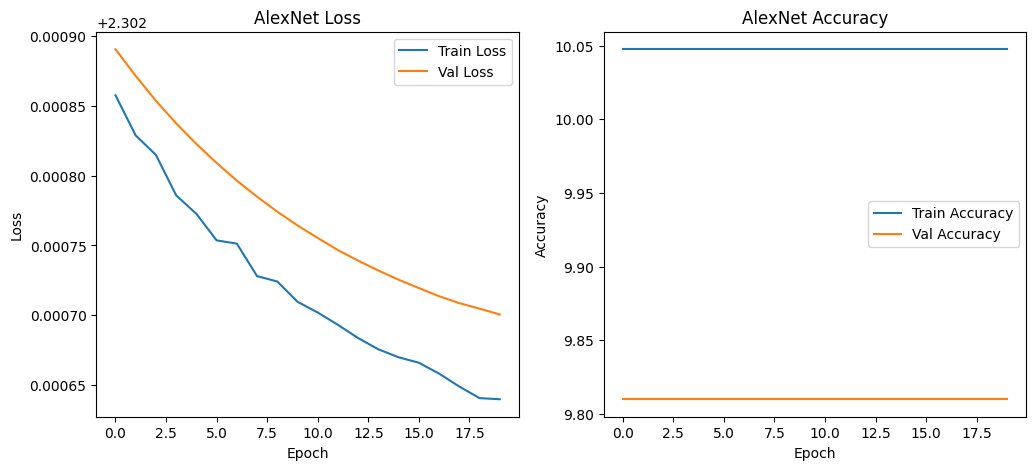

Training AlexNet with LR=0.001 and Optimizer=Adam
Epoch 1/20, Train Loss: 2.3028, Val Loss: 2.3028, Train Acc: 9.99%, Val Acc: 9.90%
Epoch 2/20, Train Loss: 2.3028, Val Loss: 2.3028, Train Acc: 10.01%, Val Acc: 9.84%
Epoch 3/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 9.94%, Val Acc: 9.90%
Epoch 4/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 9.72%, Val Acc: 10.05%
Epoch 5/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 10.01%, Val Acc: 9.86%
Epoch 6/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 9.84%, Val Acc: 10.05%
Epoch 7/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 9.88%, Val Acc: 9.84%
Epoch 8/20, Train Loss: 2.3028, Val Loss: 2.3026, Train Acc: 9.62%, Val Acc: 9.98%
Epoch 9/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 9.64%, Val Acc: 9.81%
Epoch 10/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 9.68%, Val Acc: 10.05%
Epoch 11/20, Train Loss: 2.3028, Val Loss: 2.3027, Train Acc: 9.74%, Val Acc: 9.98%
Epoch 12/20, Train Loss: 2.302

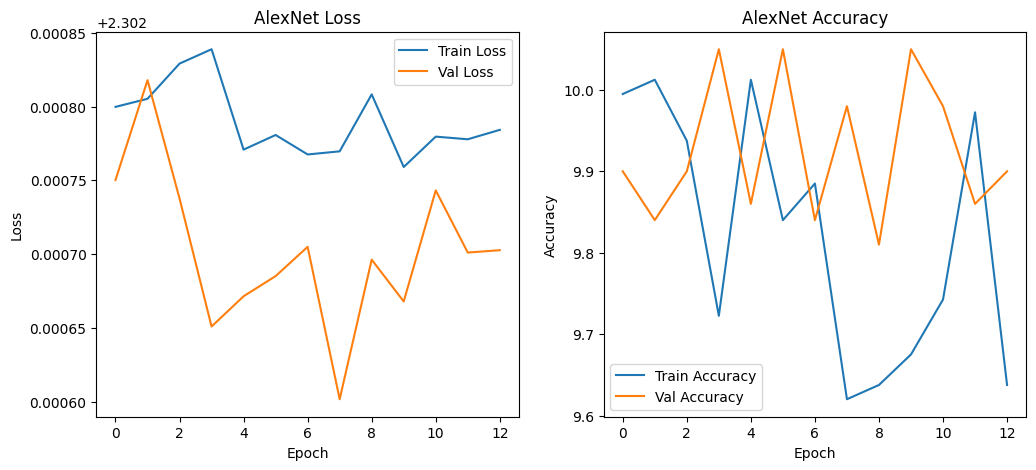

Training MobileNetV2 with LR=0.01 and Optimizer=SGD
Epoch 1/20, Train Loss: 1.9550, Val Loss: 1.7921, Train Acc: 25.16%, Val Acc: 31.24%
Epoch 2/20, Train Loss: 1.6656, Val Loss: 1.6976, Train Acc: 35.99%, Val Acc: 37.12%
Epoch 3/20, Train Loss: 1.4814, Val Loss: 1.4484, Train Acc: 44.75%, Val Acc: 46.06%
Epoch 4/20, Train Loss: 1.3176, Val Loss: 1.6092, Train Acc: 51.85%, Val Acc: 45.89%
Epoch 5/20, Train Loss: 1.1955, Val Loss: 1.2107, Train Acc: 56.26%, Val Acc: 56.71%
Epoch 6/20, Train Loss: 1.1007, Val Loss: 1.1546, Train Acc: 60.46%, Val Acc: 59.21%
Epoch 7/20, Train Loss: 1.0237, Val Loss: 1.2340, Train Acc: 63.31%, Val Acc: 55.81%
Epoch 8/20, Train Loss: 0.9566, Val Loss: 1.0957, Train Acc: 66.00%, Val Acc: 61.09%
Epoch 9/20, Train Loss: 0.9030, Val Loss: 1.0261, Train Acc: 67.90%, Val Acc: 63.96%
Epoch 10/20, Train Loss: 0.8435, Val Loss: 0.9517, Train Acc: 70.05%, Val Acc: 66.47%
Epoch 11/20, Train Loss: 0.7955, Val Loss: 0.9462, Train Acc: 71.92%, Val Acc: 66.78%
Epoch 12/20

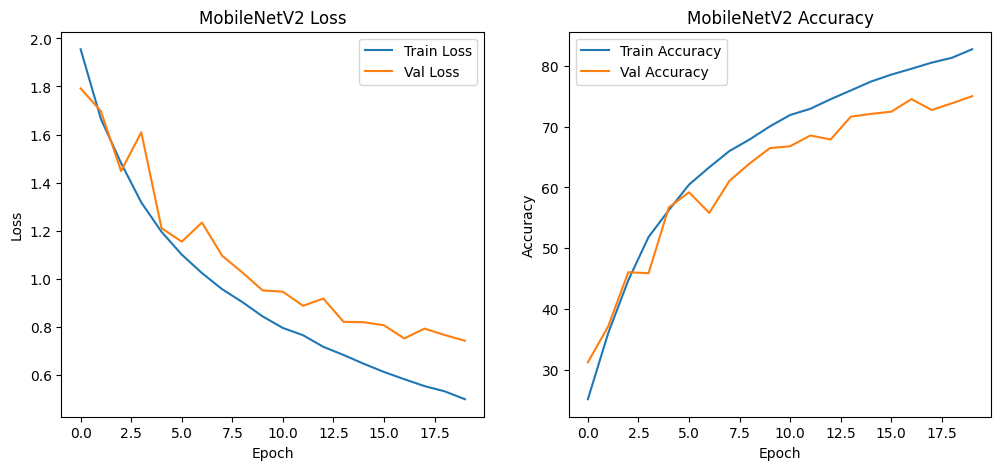

Training MobileNetV2 with LR=0.01 and Optimizer=Adam
Epoch 1/20, Train Loss: 1.6972, Val Loss: 1.9266, Train Acc: 37.78%, Val Acc: 40.26%
Epoch 2/20, Train Loss: 1.1857, Val Loss: 1.2454, Train Acc: 57.01%, Val Acc: 58.02%
Epoch 3/20, Train Loss: 0.9520, Val Loss: 1.0870, Train Acc: 65.88%, Val Acc: 63.42%
Epoch 4/20, Train Loss: 0.8068, Val Loss: 1.0691, Train Acc: 71.52%, Val Acc: 65.04%
Epoch 5/20, Train Loss: 0.7074, Val Loss: 0.9010, Train Acc: 75.21%, Val Acc: 70.65%
Epoch 6/20, Train Loss: 0.6475, Val Loss: 0.7913, Train Acc: 77.45%, Val Acc: 73.02%
Epoch 7/20, Train Loss: 0.5829, Val Loss: 0.6171, Train Acc: 79.87%, Val Acc: 78.74%
Epoch 8/20, Train Loss: 0.5420, Val Loss: 0.7764, Train Acc: 81.13%, Val Acc: 74.89%
Epoch 9/20, Train Loss: 0.4968, Val Loss: 0.5773, Train Acc: 82.89%, Val Acc: 80.37%
Epoch 10/20, Train Loss: 0.4662, Val Loss: 0.6323, Train Acc: 84.06%, Val Acc: 78.94%
Epoch 11/20, Train Loss: 0.4478, Val Loss: 0.4878, Train Acc: 84.46%, Val Acc: 83.07%
Epoch 12/2

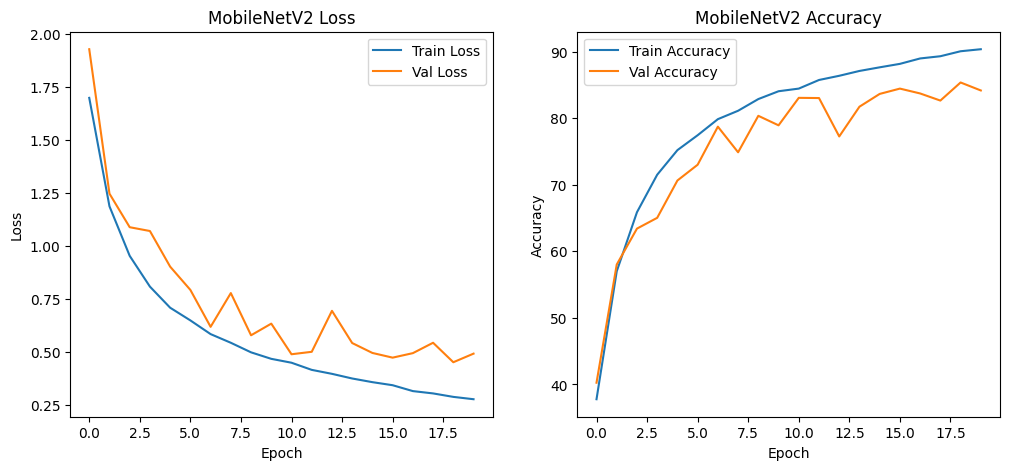

Training MobileNetV2 with LR=0.001 and Optimizer=SGD
Epoch 1/20, Train Loss: 0.2566, Val Loss: 0.4330, Train Acc: 90.98%, Val Acc: 85.68%
Epoch 2/20, Train Loss: 0.2545, Val Loss: 0.4198, Train Acc: 91.04%, Val Acc: 86.12%
Epoch 3/20, Train Loss: 0.2533, Val Loss: 0.4218, Train Acc: 91.20%, Val Acc: 85.82%
Epoch 4/20, Train Loss: 0.2510, Val Loss: 0.4255, Train Acc: 91.22%, Val Acc: 85.82%
Epoch 5/20, Train Loss: 0.2454, Val Loss: 0.4258, Train Acc: 91.48%, Val Acc: 85.95%
Epoch 6/20, Train Loss: 0.2439, Val Loss: 0.4168, Train Acc: 91.47%, Val Acc: 86.03%
Epoch 7/20, Train Loss: 0.2390, Val Loss: 0.4148, Train Acc: 91.64%, Val Acc: 86.33%
Epoch 8/20, Train Loss: 0.2405, Val Loss: 0.4163, Train Acc: 91.64%, Val Acc: 86.21%
Epoch 9/20, Train Loss: 0.2386, Val Loss: 0.4167, Train Acc: 91.75%, Val Acc: 86.43%
Epoch 10/20, Train Loss: 0.2351, Val Loss: 0.4162, Train Acc: 91.79%, Val Acc: 86.23%
Epoch 11/20, Train Loss: 0.2356, Val Loss: 0.4046, Train Acc: 91.76%, Val Acc: 86.56%
Epoch 12/2

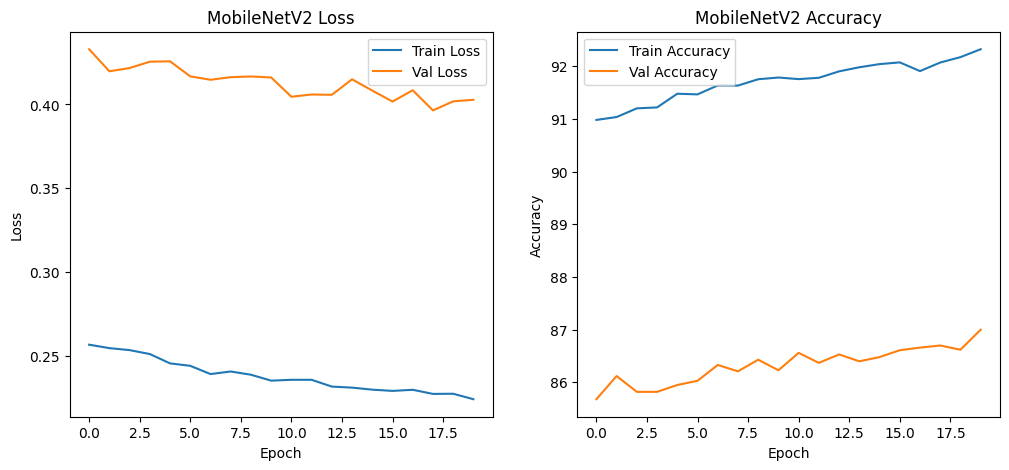

Training MobileNetV2 with LR=0.001 and Optimizer=Adam
Epoch 1/20, Train Loss: 0.1533, Val Loss: 0.3311, Train Acc: 94.64%, Val Acc: 89.31%
Epoch 2/20, Train Loss: 0.1139, Val Loss: 0.3399, Train Acc: 96.15%, Val Acc: 89.63%
Epoch 3/20, Train Loss: 0.0931, Val Loss: 0.3624, Train Acc: 96.81%, Val Acc: 89.70%
Epoch 4/20, Train Loss: 0.0786, Val Loss: 0.3737, Train Acc: 97.28%, Val Acc: 89.70%
Epoch 5/20, Train Loss: 0.0669, Val Loss: 0.3867, Train Acc: 97.78%, Val Acc: 89.54%
Epoch 6/20, Train Loss: 0.0545, Val Loss: 0.4216, Train Acc: 98.21%, Val Acc: 89.43%
Early Stopping triggered at epoch 6


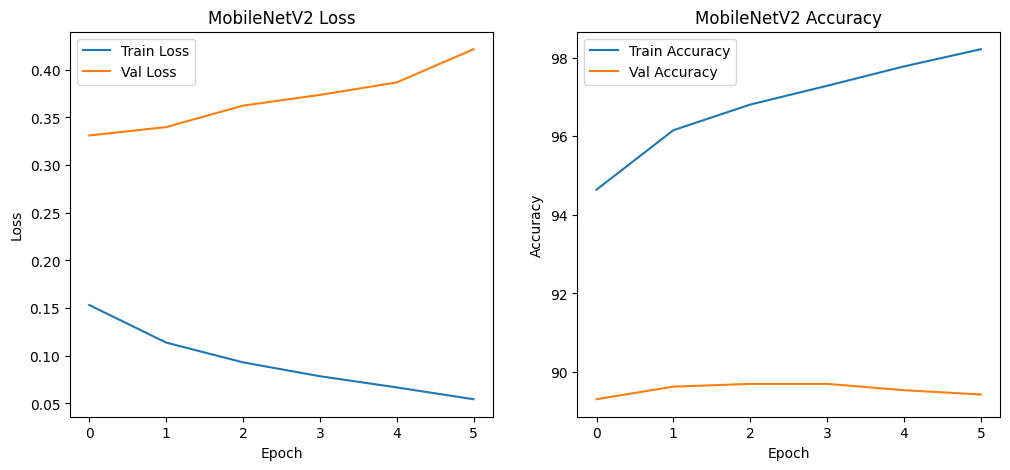

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
epochs = 20
learning_rates = [0.01, 0.001]
optimizers = [optim.SGD, optim.Adam]
patience = 5 # Early stopping tolerance

# Loop through models and hyperparameters
for model_name, model in models_dict.items():
    for lr in learning_rates:
        for optimizer_class in optimizers:
            print(f'Training {model_name} with LR={lr} and Optimizer={optimizer_class.__name__}')

            model = model.to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optimizer_class(model.parameters(), lr=lr)

            train_losses, val_losses = [], []
            train_accuracies, val_accuracies = [], []

            best_val_loss = float('inf')
            patience_counter = 0

            for epoch in range(epochs):
                train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
                val_loss, val_acc = validate(model, val_loader, criterion, device)

                train_losses.append(train_loss)
                val_losses.append(val_loss)
                train_accuracies.append(train_acc)
                val_accuracies.append(val_acc)

                print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')

                # Early Stopping determine
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience_counter = 0
                else:
                    patience_counter += 1

                if patience_counter >= patience:
                    print(f"Early Stopping triggered at epoch {epoch+1}")
                    break

            # Plot training and validation curves
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(train_losses, label='Train Loss')
            plt.plot(val_losses, label='Val Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'{model_name} Loss')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(train_accuracies, label='Train Accuracy')
            plt.plot(val_accuracies, label='Val Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'{model_name} Accuracy')
            plt.legend()

            plt.show()


#6. Test Set Evaluation

In [ ]:
def test(model, test_loader, device):
    model.eval()
    correct = 0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            correct += predicted.eq(targets).sum().item()

    test_accuracy = 100. * correct / len(test_loader.dataset)
    print(f'Test Accuracy: {test_accuracy:.2f}%')


In [ ]:
for model_name, model in models_dict.items():
  print(f'{model_name}')
  test(model, test_loader, device)

ResNet-18
Test Accuracy: 88.95%
AlexNet
Test Accuracy: 10.00%
MobileNetV2
Test Accuracy: 89.36%
